# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    # print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | port moresby
Processing Record 9 of Set 1 | poronaysk
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | the dalles
Processing Record 16 of Set 1 | shalkar
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | tayzhina
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | gering
Processing Record 21 of Set 1 | amos
Processing Record 22 of Set 1 | saryozek
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,71.65,76,56,22.77,PN,1723158193
1,albany,42.6001,-73.9662,65.26,75,99,3.00,US,1723157591
2,fortuna,40.5982,-124.1573,68.94,78,20,14.97,US,1723158196
3,grytviken,-54.2811,-36.5092,4.15,76,17,15.70,GS,1723158198
4,bredasdorp,-34.5322,20.0403,55.58,78,80,26.93,ZA,1723158200


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,71.65,76,56,22.77,PN,1723158193
1,albany,42.6001,-73.9662,65.26,75,99,3.00,US,1723157591
2,fortuna,40.5982,-124.1573,68.94,78,20,14.97,US,1723158196
3,grytviken,-54.2811,-36.5092,4.15,76,17,15.70,GS,1723158198
4,bredasdorp,-34.5322,20.0403,55.58,78,80,26.93,ZA,1723158200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

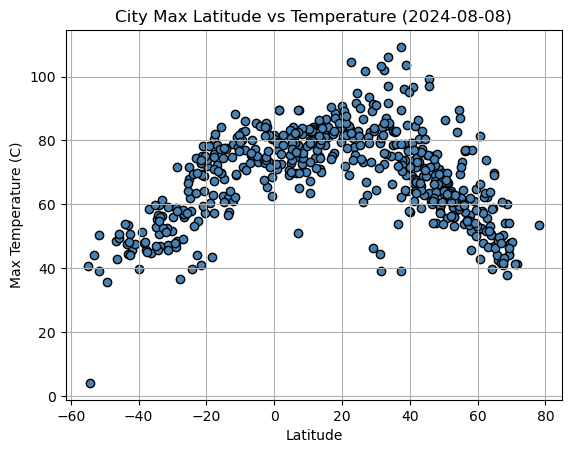

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-08-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

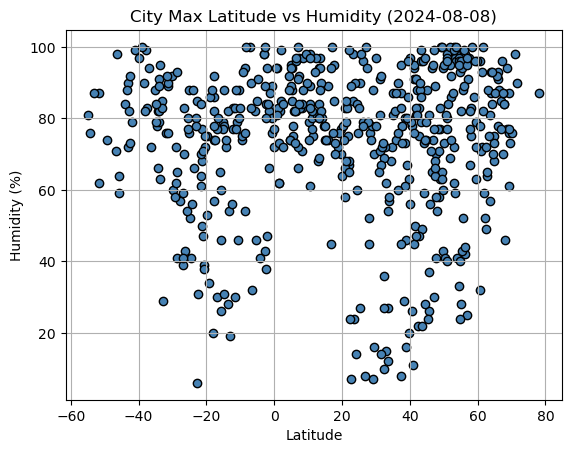

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2024-08-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

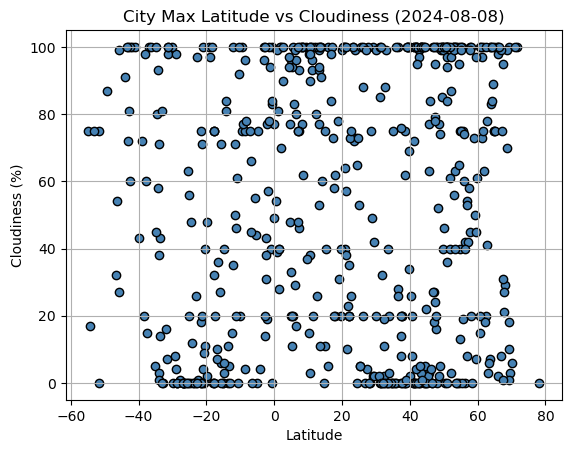

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2024-08-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

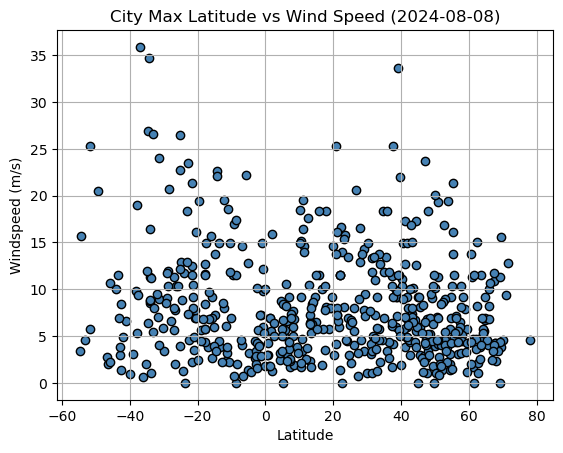

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2024-08-08)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots.  used Xpert AI to fix code errors
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values, y_values, color="blue")
    plt.plot(x_values, regress_values, "r-")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,65.26,75,99,3.00,US,1723157591
2,fortuna,40.5982,-124.1573,68.94,78,20,14.97,US,1723158196
6,ribeira grande,38.5167,-28.7000,73.78,80,0,5.99,PT,1723158204
8,poronaysk,49.2167,143.1167,60.19,100,99,9.06,RU,1723158208
12,okhotsk,59.3833,143.3000,64.83,63,7,5.77,RU,1723158215


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,71.65,76,56,22.77,PN,1723158193
3,grytviken,-54.2811,-36.5092,4.15,76,17,15.70,GS,1723158198
4,bredasdorp,-34.5322,20.0403,55.58,78,80,26.93,ZA,1723158200
5,afaahiti,-17.7500,-149.2833,75.87,86,32,11.61,PF,1723158203
7,port moresby,-9.4431,147.1797,80.02,74,75,11.50,PG,1723158206


###  Temperature vs. Latitude Linear Regression Plot

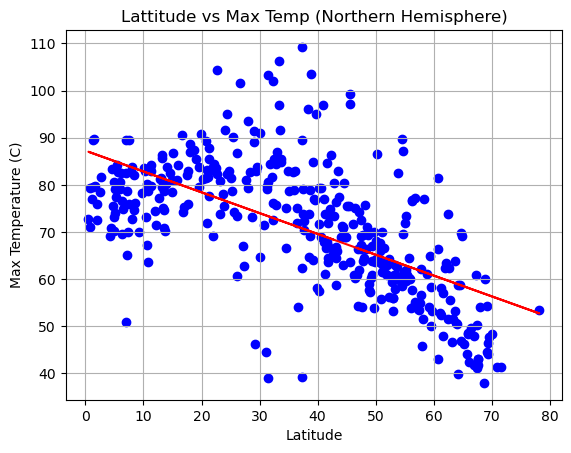

In [47]:
# Linear regression on Northern Hemisphere
  
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Lattitude vs Max Temp (Northern Hemisphere)", 
    "Latitude", 
    "Max Temperature (C)")


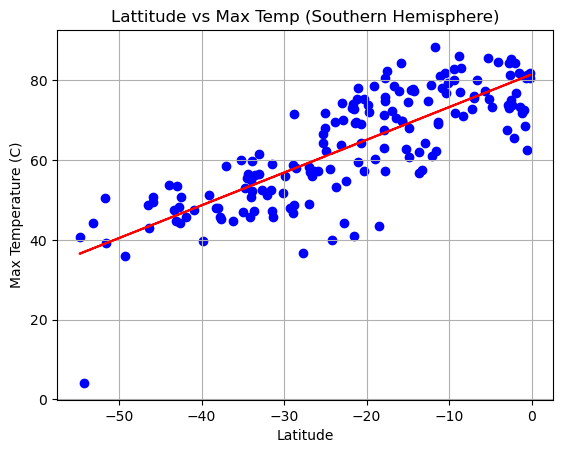

In [40]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Lattitude vs Max Temp (Southern Hemisphere)", 
    "Latitude", 
    "Max Temperature (C)")

**Discussion about the linear relationship:** The temp generally gets cooler as you move closer to the poles and away from the equator.

### Humidity vs. Latitude Linear Regression Plot

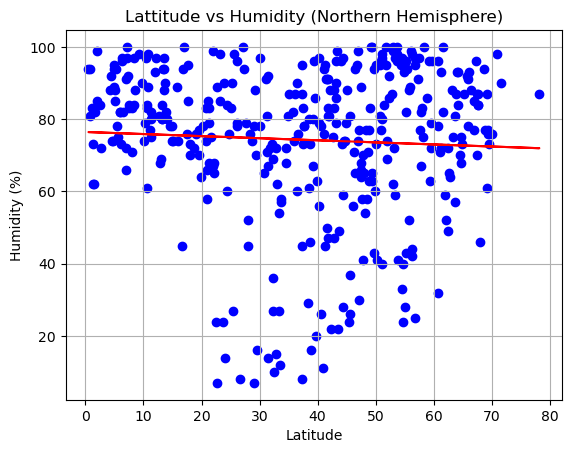

In [48]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Lattitude vs Humidity (Northern Hemisphere)", 
    "Latitude", 
    "Humidity (%)")

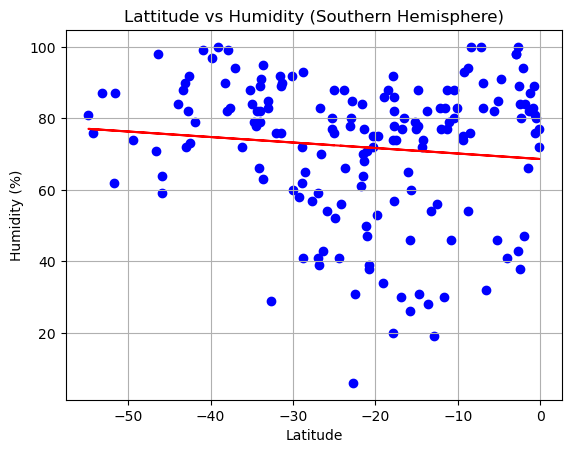

In [49]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Lattitude vs Humidity (Southern Hemisphere)", 
    "Latitude", 
    "Humidity (%)")

**Discussion about the linear relationship:** There doesn't seem to be a distinct correlation between lattitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

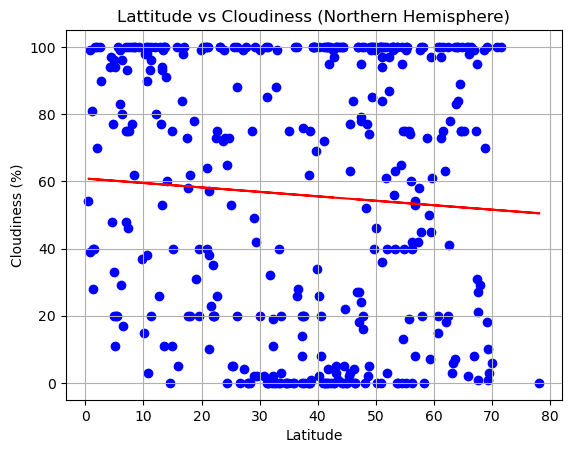

In [50]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Lattitude vs Cloudiness (Northern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)")

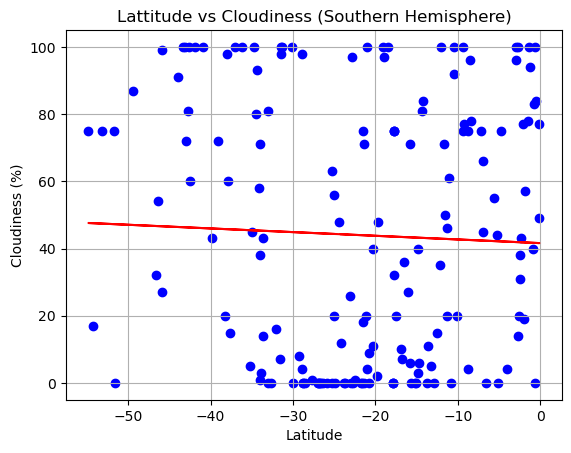

In [51]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Lattitude vs Cloudiness (Southern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)")

**Discussion about the linear relationship:** Cloudiness doesn't seem to be affected by lat

### Wind Speed vs. Latitude Linear Regression Plot

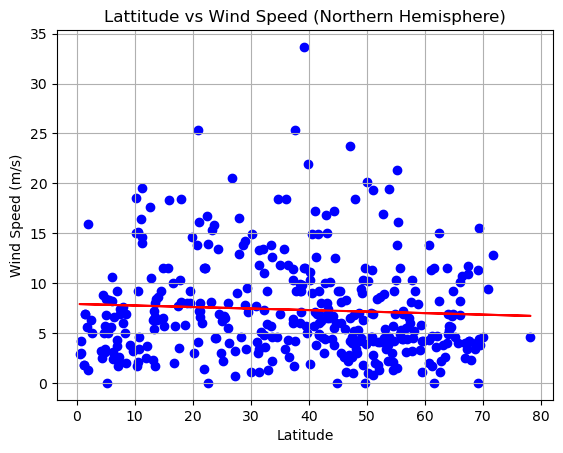

In [52]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Lattitude vs Wind Speed (Northern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)")

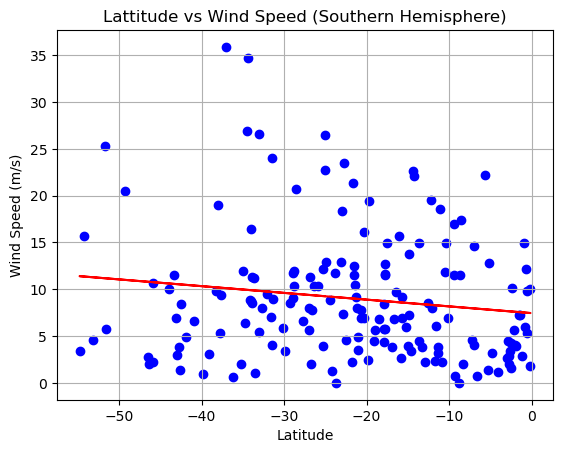

In [53]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Lattitude vs Wind Speed (Southern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)")

**Discussion about the linear relationship:** I don't see much of a correlation found between windspeed and lat